In [12]:
import pandas as pd
import matplotlib.pyplot as plt

First checking for RE = 100

In [13]:


df1 = pd.read_csv("cfd_re100_n.csv")
df2 = pd.read_csv("true_re100.csv")
arr = [0, 7, 8, 9, 13, 22, 36, 58, 64, 79, 94, 109, 122, 123, 124, 125, 128]

HORIZONTAL VELOCITY VALUES AT SPECIFIC POSTIONS AS CALCUALTED BY SOLVER

In [14]:
df1

,Unnamed: 0,0
0,0,0.000000
1,1,-0.004911
2,2,-0.009635
3,3,-0.014186
4,4,-0.018578
...,...,...
124,124,0.798479
125,125,0.849149
126,126,0.900039
127,127,0.950566


Values as per Ghia et.al

In [15]:

filtered_df1 = df1[df1.iloc[:, 0].isin(arr)]
filtered_df1

,Unnamed: 0,0
0,0,0.000000
7,7,-0.030934
8,8,-0.034817
9,9,-0.038600
13,13,-0.052923
22,22,-0.082422
36,36,-0.126630
58,58,-0.177165
64,64,-0.176431
79,79,-0.125832


In [16]:
df2

,value
0,0.00000
1,-0.03717
2,-0.04192
3,-0.04775
4,-0.06434
5,-0.10150
6,-0.15662
7,-0.21090
8,-0.20581
9,-0.13641


In [17]:
import numpy as np


df2_row = df2.values  


df1_vals = filtered_df1.iloc[:, 1:].values  


# Compute RMSE for each row
rmse = np.sqrt(np.mean((df1_vals - df2_row)**2, axis=1))

# relative rmse 
rel_rmse = rmse.mean() / np.ptp(df2.values)
print("Relative RMSE:", rel_rmse)

Relative RMSE: 0.009961938606138294


RMSE VALUE OF 0.0099 IS IMPRESSIVE!

NOW PLOTTING THE TRUE AND CALCULATED VALUES

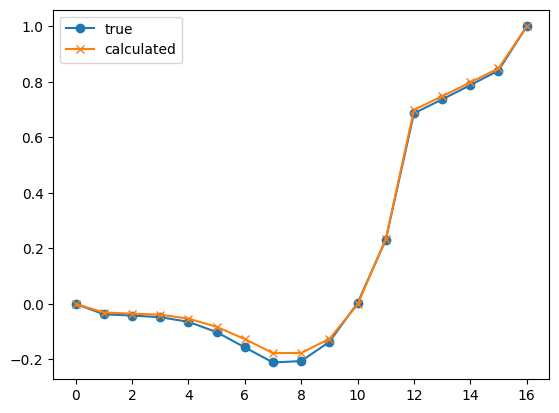

In [18]:
x = range(len(df2_row))
plt.plot(x, df2_row, label='true', marker='o')
plt.plot(x, df1_vals, label='calculated', marker='x')

plt.legend()
plt.show()


NOW FOR RE  =400

In [19]:
df1 = pd.read_csv("cfd_re400_n.csv")
df2 = pd.read_csv("cfd_true400.csv")
arr = [0, 7, 8, 9, 13, 22, 36, 58, 64, 79, 94, 109, 122, 123, 124, 125, 128]

filtered_df1 = df1[df1.iloc[:, 0].isin(arr)]

import numpy as np


df2_row = df2.values  


df1_vals = filtered_df1.iloc[:, 1:].values  


# Compute RMSE for each row
rmse = np.sqrt(np.mean((df1_vals - df2_row)**2, axis=1))

# relative rmse 
rel_rmse = rmse.mean() / np.ptp(df2.values)
print("Relative RMSE:", rel_rmse)

Relative RMSE: 0.0355753659737649


RMSE OF 0.036 CERTAINLY SHOWS THAT ACCURACY IS COMPROMISED AT HIGHER SPEEDS (This could also be due to the fact that upwind schemes have not been used.)

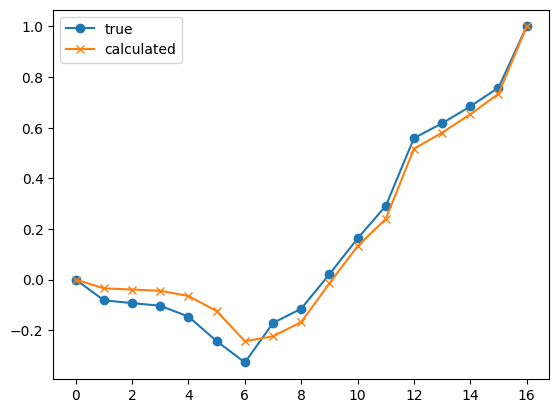

In [20]:
x = range(len(df2_row))
plt.plot(x, df2_row, label='true', marker='o')
plt.plot(x, df1_vals, label='calculated', marker='x')
plt.legend()
plt.show()